In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
ds=pd.read_excel('Customer Churn.xlsx')
ds

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [3]:
ds.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [4]:
#Replacing missing values with mean
#df['Seconds of Use'] = df['Seconds of Use'].fillna(df['Seconds of Use'].mean())
#df['Frequency of SMS'] = df['Frequency of SMS'].fillna(df['Frequency of SMS'].mean())

In [5]:
#x = np.array(ds.iloc[0:, 1:])
#y = np.array(ds['Churn'])

In [6]:
x=ds.iloc[:,0:13]
y=ds.iloc[:,13]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
import math
math.sqrt(len(y_test))

25.099800796022265

In [9]:
classi=KNeighborsClassifier(n_neighbors=25,p=2,metric='euclidean')

In [10]:
classi.fit(X=x_train,y=y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=25)

## DONE

In [11]:
y_pred=classi.predict(X=x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[514   7]
 [ 37  72]]


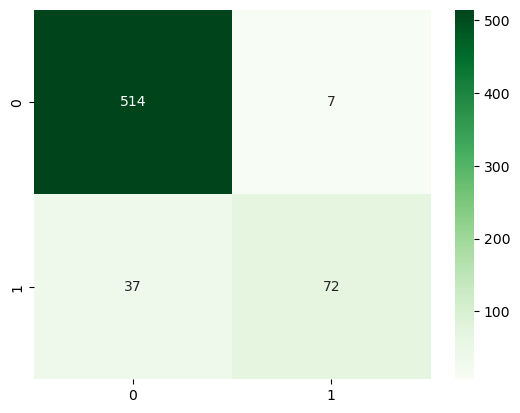

In [13]:
classnames=['0','1']

sns.heatmap(cm,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='g',cmap="Greens");

In [14]:
print(accuracy_score(y_test,y_pred))

0.9301587301587302


In [15]:
print(precision_score(y_test,y_pred))

0.9113924050632911


In [16]:
print(f1_score(y_test,y_pred))

0.7659574468085106


In [17]:
print(recall_score(y_test,y_pred))

0.6605504587155964


## train

In [18]:
y_pred=classi.predict(X=x_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
cm=confusion_matrix(y_train,y_pred)
print(cm)

[[2104   30]
 [ 132  254]]


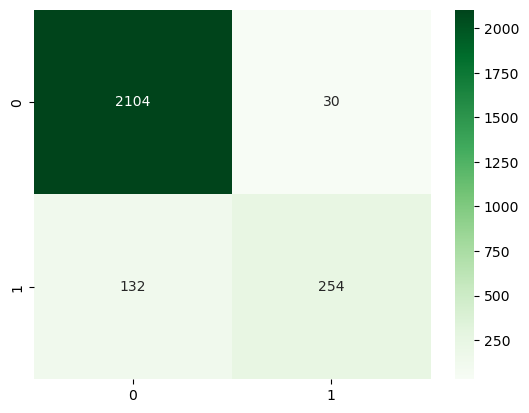

In [20]:
classnames=['0','1']

sns.heatmap(cm,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='g',cmap="Greens");

In [21]:
print(accuracy_score(y_train,y_pred))

0.9357142857142857


In [22]:
print(precision_score(y_train,y_pred))

0.8943661971830986


In [23]:
print(f1_score(y_train,y_pred))

0.7582089552238805


In [24]:
print(recall_score(y_train,y_pred))

0.6580310880829016


In [25]:
result = classi.predict([[0,38,0,4370.0,71,5.0,17,3,1,1,30,197.64,1]])
print(result)

[0]
